<a id="top"></a>
<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Lab 01</br></br> <I style = "font-size: 20px">by: Ahmed Sharaf</I></div>



## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
simple_lr_data = pd.read_csv("RegData.csv", header = None, names = ["X", "Y"])

#### Explore your data

In [3]:
simple_lr_data

,X,Y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
y = simple_lr_data.iloc[:, -1].to_numpy().reshape((-1, 1))
x = simple_lr_data.iloc[:, :simple_lr_data.shape[1]-1].to_numpy()

#### Explore your data

In [5]:
y

array([[4.        ],
       [7.4000001 ],
       [5.        ],
       [7.19999981],
       [7.9000001 ],
       [6.0999999 ],
       [6.        ],
       [5.80000019],
       [5.19999981],
       [4.19999981],
       [4.        ],
       [4.4000001 ],
       [5.19999981]])

In [6]:
x

array([[2.9000001 ],
       [6.69999981],
       [4.9000001 ],
       [7.9000001 ],
       [9.80000019],
       [6.9000001 ],
       [6.0999999 ],
       [6.19999981],
       [6.        ],
       [5.0999999 ],
       [4.69999981],
       [4.4000001 ],
       [5.80000019]])

#### Plot the original data (scatter plot of X,y)

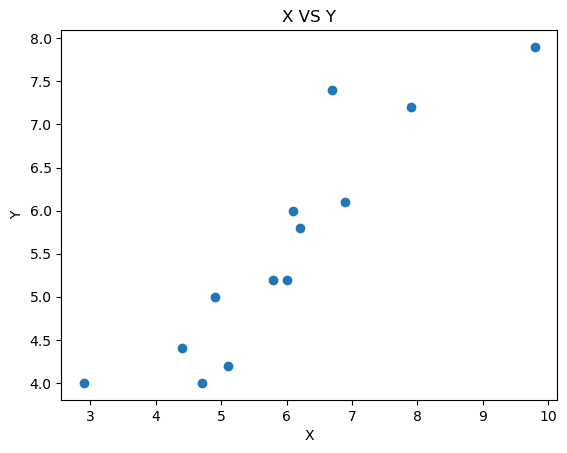

In [7]:
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X VS Y")
plt.show();

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

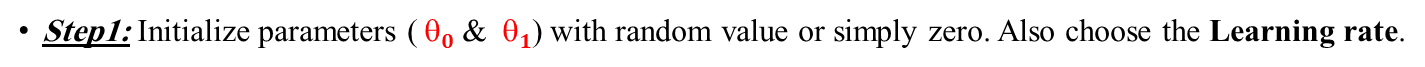

In [8]:
theta0 = 0
theta1 = 0
lr = 0.01

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.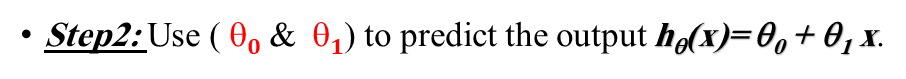
#### Note: you will need to iterate through all data points

In [9]:
y_pred = theta0 + theta1 * x
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).
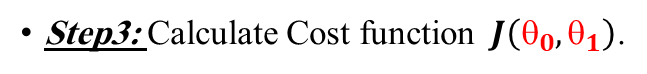<br/>
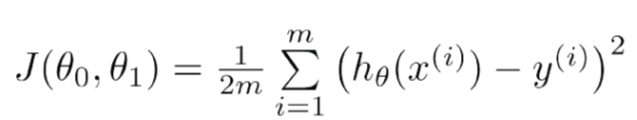

In [10]:
m = x.shape[0]
j = (1 / (2*m)) * np.sum(np.pow(y_pred - y, 2))
j

np.float64(16.305384479692318)

### Step4: Calculate the gradient.
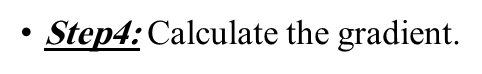<br />
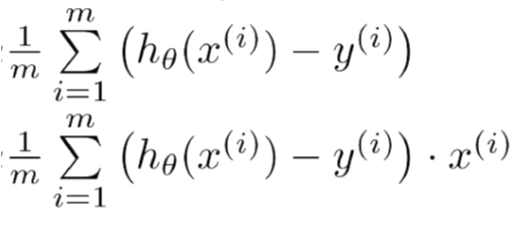

In [11]:
error = y_pred - y
grad_theta0 = (1 / m) * np.sum(error)
grad_theta1 = (1 / m) * np.sum(error * x)

print(f"Gradient Of Theta0 : {grad_theta0}")
print(f"Gradient Of Theta1 : {grad_theta1}")

Gradient Of Theta0 : -5.569230739769231
Gradient Of Theta1 : -35.043846043215375


### Step5: Update the parameters (simultaneously).
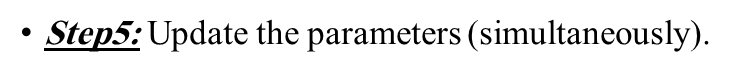<br />
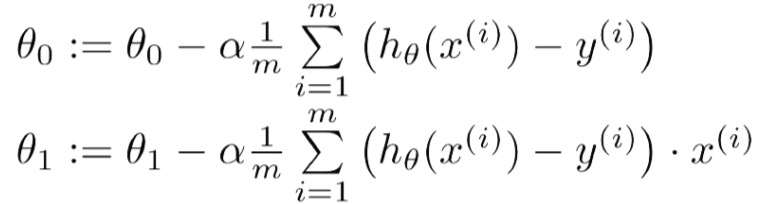

In [12]:
theta0 -= (lr * grad_theta0)
theta1 -= (lr * grad_theta1)

print(f"Theta0 : {theta0}")
print(f"Theta1 : {theta1}")

Theta0 : 0.05569230739769231
Theta1 : 0.35043846043215376


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.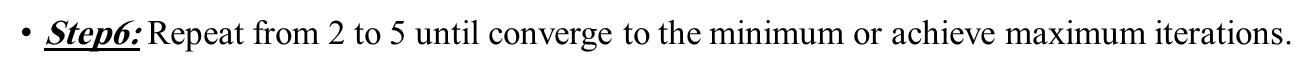

In [13]:
iterations = 1000
grad_theta0 = 0
grad_theta1 = 1
cost = 0

for i in range(iterations):
    # Step 1 - Predict Y
    y_pred = theta0 + theta1 * x

    # Step 2 - Calc Error
    error = y_pred - y

    # Step 3 - Cost 
    cost = (1 / (2*m)) * np.sum(np.pow(error, 2))

    # Step 4 - Calc Gradient
    grad_theta0 = (1 / m) * np.sum(error)
    grad_theta1 = (1 / m) * np.sum(error * x)

    # Step 5 - Update Parameters
    theta0 -= (lr * grad_theta0)
    theta1 -= (lr * grad_theta1)

print("final cost = ", cost)

final cost =  0.15729383730060195


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [14]:
h = theta0 + theta1 * x
h

array([[3.09530063],
       [6.11791068],
       [4.68614814],
       [7.07241941],
       [8.58372462],
       [6.27699566],
       [5.6406565 ],
       [5.7201988 ],
       [5.5611142 ],
       [4.84523274],
       [4.52706317],
       [4.28843627],
       [5.4020296 ]])

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

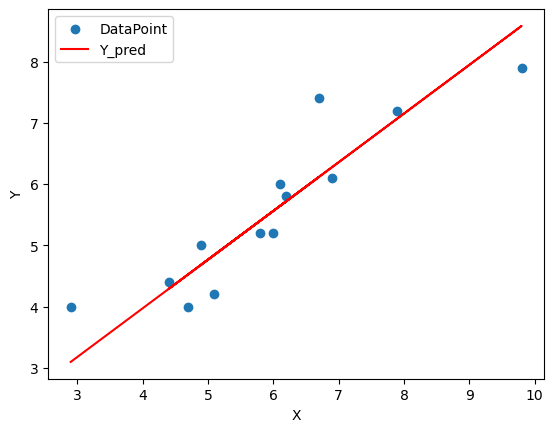

In [15]:
plt.scatter(x, y, label = "DataPoint")
plt.plot(x, h, 'r', label = "Y_pred")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

#### Use R2 score to evaluate LR equation output
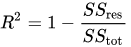
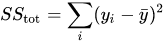
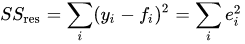
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [16]:
ssr = np.sum(np.pow(y - h, 2))
sst = np.sum(np.pow(h - np.mean(y), 2))
r2 = 1 - (ssr / sst)
print(f"R2 Score = {r2}")

R2 Score = 0.8170875974846195


In [17]:
r2_score(y, y_pred)

0.8026968191397711

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [18]:
m = x.shape[0]
theta = np.zeros(shape = (1, x.shape[1]+1))
x = np.block([np.ones(shape = (m, 1)), x])
EPOCHS = 1000
cost = []
for i in range(EPOCHS):
    # Step 1 - Predict y
    y_pred = x @ theta.T
    # Step 2 - Calc Error
    error = y_pred - y
    # Step 3 - Calc Cost
    cost.append((1 / (2 * m)) * np.sum(np.pow(error, 2)))
    # Step 4 - Calc Gradient
    gradient = (1 / m) * error.T @ x
    # Step 5 - Update
    theta -= (lr*gradient)
print(theta)

[[0.78812307 0.79549387]]


#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

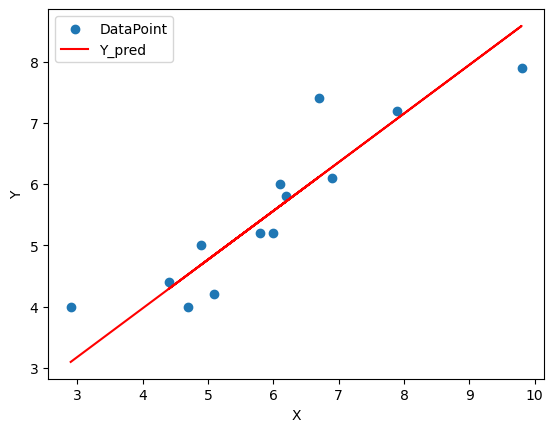

In [19]:
y_pred = x @ theta.T
plt.scatter(x[:, -1], y, label = "DataPoint")
plt.plot(x[:, -1], y_pred, 'r', label = "Y_pred")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [20]:
ssr = np.sum(np.pow(y_pred - y, 2))
sst = np.sum(np.pow(y_pred - np.mean(y), 2))
r2 = 1 - (ssr / sst)
r2

np.float64(0.8170961349628745)

In [21]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.8026968191397711

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

In [22]:
# actually i calculated it before

### Plot loss vs. iterations

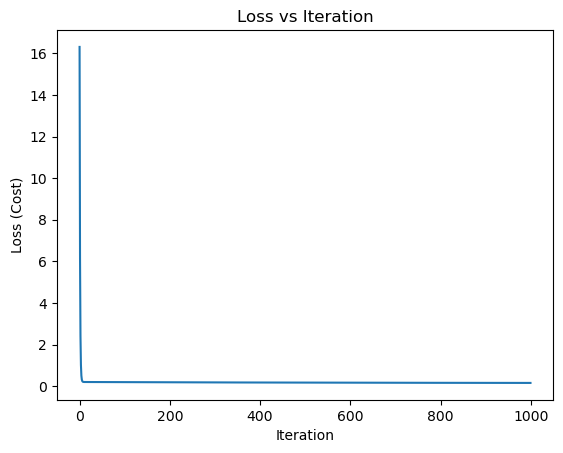

In [23]:
plt.plot(cost)
plt.xlabel("Iteration")
plt.ylabel("Loss (Cost)")
plt.title("Loss vs Iteration")
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [24]:
multiple_lr_data = pd.read_csv("MultipleLR.csv", header = None, names = ["X1", "X2", 'X3', "Y"])
multiple_lr_data

,X1,X2,X3,Y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [25]:
y = multiple_lr_data.iloc[:, -1].to_numpy().reshape((-1, 1))
x = multiple_lr_data.iloc[:, :multiple_lr_data.shape[1]-1].to_numpy()

In [26]:
y

array([[152],
       [185],
       [180],
       [196],
       [142],
       [101],
       [149],
       [115],
       [175],
       [164],
       [141],
       [141],
       [184],
       [152],
       [148],
       [192],
       [147],
       [183],
       [177],
       [159],
       [177],
       [175],
       [175],
       [149],
       [192]])

In [27]:
x

array([[ 73,  80,  75],
       [ 93,  88,  93],
       [ 89,  91,  90],
       [ 96,  98, 100],
       [ 73,  66,  70],
       [ 53,  46,  55],
       [ 69,  74,  77],
       [ 47,  56,  60],
       [ 87,  79,  90],
       [ 79,  70,  88],
       [ 69,  70,  73],
       [ 70,  65,  74],
       [ 93,  95,  91],
       [ 79,  80,  73],
       [ 70,  73,  78],
       [ 93,  89,  96],
       [ 78,  75,  68],
       [ 81,  90,  93],
       [ 88,  92,  86],
       [ 78,  83,  77],
       [ 82,  86,  90],
       [ 86,  82,  89],
       [ 78,  83,  85],
       [ 76,  83,  71],
       [ 96,  93,  95]])

### Repeat your implementation but for more than one variable

In [28]:
m = x.shape[0]
theta = np.zeros(shape = (1, x.shape[1]+1))
x = np.block([np.ones(shape = (m, 1)), x])
lr = 0.0001

EPOCHS = 1000
cost = []
for i in range(EPOCHS):
    # Step 1 - Predict y
    y_pred = x @ theta.T
    # Step 2 - Calc Error
    error = y_pred - y
    # Step 3 - Calc Cost
    cost.append((1 / (2 * m)) * np.sum(error ** 2))
    # Step 4 - Calc Gradient
    gradient = (1 / m) * error.T @ x
    # Step 5 - Update
    theta -= (lr*gradient)
print(theta)

[[0.00289951 0.44203697 0.51777825 1.05569807]]


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [29]:
y_pred = x @ theta.T
y_pred

array([[152.87121322],
       [184.85674383],
       [181.47483649],
       [198.75052368],
       [140.34382743],
       [105.31205204],
       [150.10779197],
       [113.11610301],
       [174.37742357],
       [164.06972743],
       [143.81388672],
       [142.72273052],
       [186.36979543],
       [153.41203893],
       [151.08774876],
       [188.54161627],
       [145.10262039],
       [180.58785665],
       [177.3277855 ],
       [158.74612896],
       [175.79168644],
       [174.43302327],
       [167.19171348],
       [151.52786662],
       [190.88314212]])

### Plot loss vs. iterations

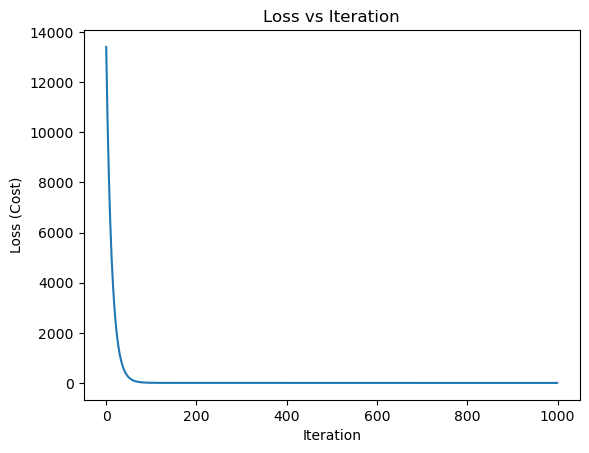

In [30]:
plt.plot(cost)
plt.xlabel("Iteration")
plt.ylabel("Loss (Cost)")
plt.title("Loss vs Iteration")
plt.show()

#### Use R2 score to evaluate LR equation output

In [31]:
ssr = np.sum(np.pow(y_pred - y, 2))
sst = np.sum(np.pow(y_pred - np.mean(y), 2))
r2 = 1 - (ssr / sst)
r2

np.float64(0.9880085920366494)

In [32]:
r2_score(y, y_pred)

0.9886850607889688

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [33]:
y = simple_lr_data.iloc[:, -1].to_numpy().reshape((-1, 1))
x = simple_lr_data.iloc[:, :simple_lr_data.shape[1]-1].to_numpy()

In [34]:
model = LinearRegression()

#### Train the model (fit the model to the training data)

In [35]:
model.fit(x, y)

LinearRegression()

#### Predict y values using the trained model

In [36]:
y_pred = model.predict(x)

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

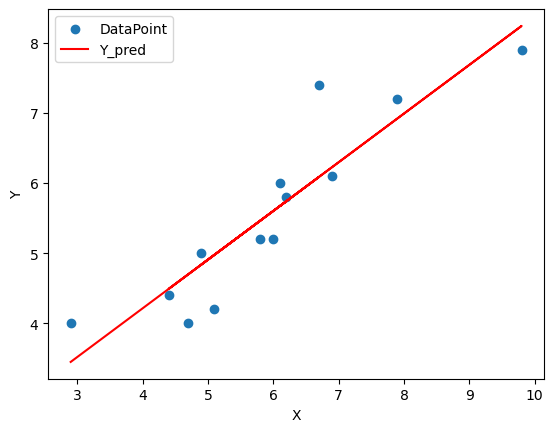

In [37]:
plt.scatter(x, y, label = "DataPoint")
plt.plot(x, y_pred, 'r', label = "Y_pred")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

#### Use R2 score to evaluate model output

In [38]:
r2_score(y, y_pred)

0.8213156778363777

### Repeat for Mulivariate

In [39]:
y = multiple_lr_data.iloc[:, -1].to_numpy().reshape((-1, 1))
x = multiple_lr_data.iloc[:, :multiple_lr_data.shape[1]-1].to_numpy()

In [40]:
model = LinearRegression()
model

LinearRegression()

In [41]:
model.fit(x, y)

LinearRegression()

In [42]:
y_pred = model.predict(x)

In [43]:
r2_score(y, y_pred)

0.98966157894484